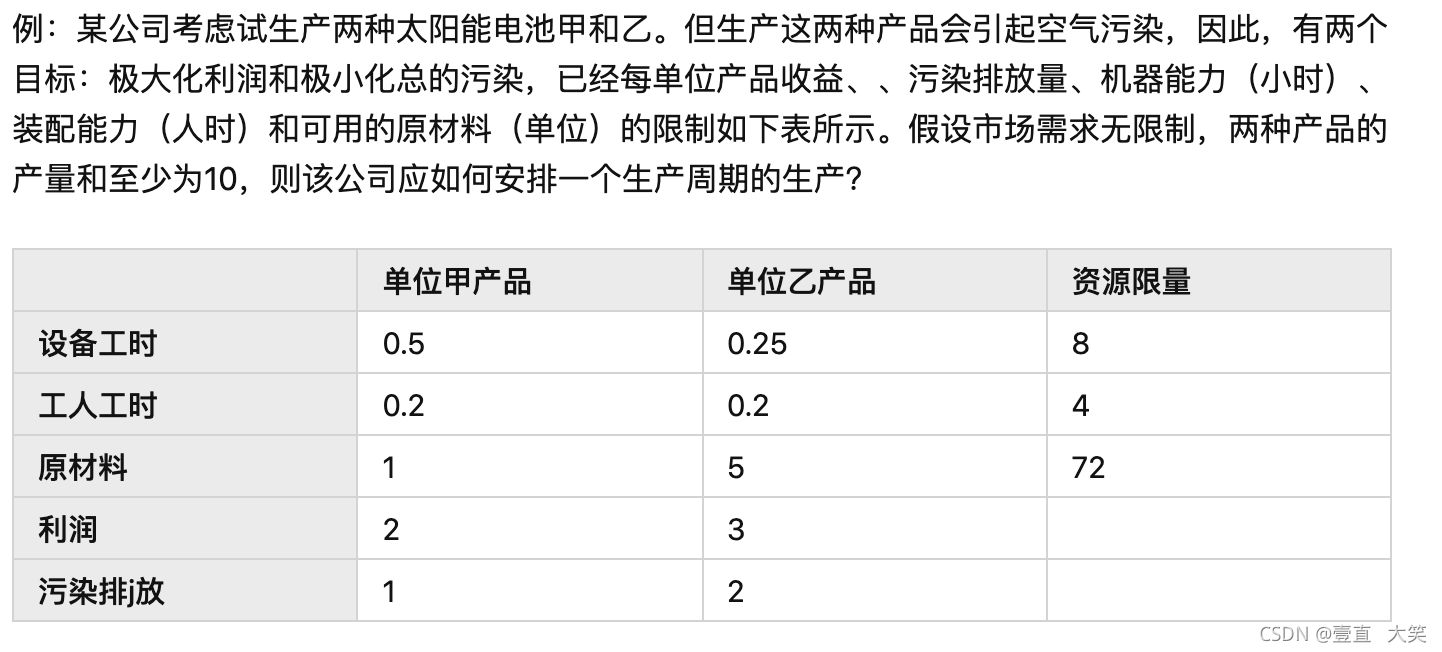

In [2]:
import cvxpy as cp
import numpy as np

c1 = np.array([-2, -3])
c2 = np.array([1, 2])
a = np.array([[0.5, 0.25], [0.2, 0.2], [1, 5], [-1, -1]])
b = np.array([8, 4, 72, -10])
x = cp.Variable(2, pos=True)

# 1.线性加权法求解
obj = cp.Minimize(0.5 * (c1 + c2) @ x)
con = [a @ x <= b]
prob = cp.Problem(obj, con)
prob.solve(solver='GUROBI')
print('\n======1.线性加权法======\n')
print('解法一理想解：', x.value)
print('利润：', -c1 @ x.value)
print('污染排放：', c2 @ x.value)

# 2.理想点法求解
obj1 = cp.Minimize(c1 @ x)
prob1 = cp.Problem(obj1, con)
prob1.solve(solver='GUROBI')
v1 = prob1.value  # 第一个目标函数的最优值
obj2 = cp.Minimize(c2 @ x)
prob2 = cp.Problem(obj2, con)
prob2.solve(solver='GUROBI')
v2 = prob2.value  # 第二个目标函数的最优值
print('\n======2.理想点法======\n')
print('两个目标函数的最优值分别为：', v1, v2)
obj3 = cp.Minimize((c1 @ x - v1) ** 2 + (c2 @ x - v2) ** 2)
prob3 = cp.Problem(obj3, con)
prob3.solve(solver='GUROBI')  # GLPK_MI 解不了二次规划，只能用CVXOPT求解器
print('解法二的理想解：', x.value)
print('利润：', -c1 @ x.value)
print('污染排放：', c2 @ x.value)

# 3.序贯法求解
con.append(c1 @ x == v1)
prob4 = cp.Problem(obj2, con)
prob4.solve(solver='GUROBI')
x3 = x.value  # 提出最优解的值
print('\n======3.序贯法======\n')
print('解法三的理想解：', x3)
print('利润：', -c1 @ x3)
print('污染排放：', c2 @ x3)

Restricted license - for non-production use only - expires 2023-10-25

======1.线性加权法======

解法一理想解： [ 7. 13.]
利润： 52.99999999999999
污染排放： 33.0

======2.理想点法======

两个目标函数的最优值分别为： -52.99999999999999 10.0
解法二的理想解： [13.36  5.28]
利润： 42.56000000000696
污染排放： 23.92000000000538

======3.序贯法======

解法三的理想解： [ 7. 13.]
利润： 52.99999999999999
污染排放： 32.99999999999999


In [3]:
from cvxpy import *

# Create two scalar optimization variables.
# 在CVXPY中变量有标量(只有数值大小)，向量，矩阵。
# 在CVXPY中有常量(见下文的Parameter)
x = Variable()
y = Variable()
# Create two constraints.
constraints = [x + y == 1,
               x - y >= 1]
obj = Minimize(square(x - y))
prob = Problem(obj, constraints)
prob.solve()  # Returns the optimal value.
print("status:", prob.status)
print("optimal value", prob.value)
print("optimal var", x.value, y.value)


status: optimal
optimal value 1.0
optimal var 1.0 1.570086213240983e-22
